# Проведение и анализ А/В Теста

# *Задача*
Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустите A/B-тест и проанализировать результаты.
# *Данные*
список гипотез: файл (/datasets/hypothesis.csv)

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

*информация о заказах пользователей в интернет-магазине: файл (/datasets/orders.csv)*

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

*информация о посещениях пользователями интернет-магазина: файл (/datasets/visitors.csv)*

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

# *Ход работы*

Часть 1. Приоритизация гипотез.

1.1 Применить фреймворк ICE для приоритизации гипотез.

1.2 Применить фреймворк RICE для приоритизации гипотез.

1.3 Выводы о том как изменилась приоритизация гипотез при применении RICE вместо ICE. 

Часть 2. Анализ A/B-теста

2.1 Изучение и предобработка данных A/B-теста.

2.2 Анализ данных A/B-теста.

Вывод

In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
import warnings

from scipy import stats as st

In [2]:
# снимаем ограничение на количество и ширину столбцов
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## 1 Часть. Приоритизация гипотез.

### Примените фреймворк ICE для приоритизации гипотез.

In [3]:
#Откроем файл с данными, сохраним в переменной hypothesis, 
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [4]:
# обзор данных
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# Названия столбцов необходимо привести к хорошему стилю.
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head(5)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Загрузив данные мы видим, что каждый параметр в датафрейме hypothesis оценен по шкале от 0 до 10.
Применим ICE - способ приоретизации задач.

In [6]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

# Выведим первые 4 наиболее перспективные гипотезы
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).head(4)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000


###  Примените фреймворк RICE для приоритизации гипотез.

In [7]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [8]:
# Выведим первые 4 наиболее перспективные гипотезы
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False).head(4)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0


### Выводы о том как изменилась приоритизация гипотез при применении RICE вместо ICE.

При применении метода ICE на первом месте оказалась гипотеза с индексом 8. За ней соотвественно расположились гипотезы с индексами 0, 7, 6.
Если же вместо ICE применить метод RICE. На первое место выходит гипотеза с индексом 7. Это произошло потому что при расчете методом RICE появляется параметр reach - (скольких пользователей затронет изменение, которое вы хотите внести). И у гипотезы под индексом 7 он самый высокий и равен 10.

## 2 Часть. Анализ A/B-теста.

###  Изучение и предобработка данных A/B-теста.

In [9]:
#Откроем файлs с данными, сохраним в переменной orders и visitors.
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [10]:
# обзор данных orders
orders.info()
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [11]:
# обзор данных visitors
visitors.info()
visitors.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Ознакомившись с данными таблиц первое что необходимо сделать - заменить тип данных в столбцах date.
Так же проверим таблицы на наличие пользователей, попавших в обе группах теста одновременно.

In [12]:
# Заменим тип данных в столбце date в обеих таблицах.
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])


In [13]:
# Найдем пользователей оказавшихся одновременнов обеих группах
users_A = orders.query('group == "A"').reset_index(drop=True)
users_B = orders.query('group == "B"').reset_index(drop=True)
print('Количество пользователей в группе А:', users_A['visitorId'].count())
print('Количество пользователей в группе B:', users_B['visitorId'].count())


Количество пользователей в группе А: 557
Количество пользователей в группе B: 640


In [14]:
visitor_A = users_A['visitorId'].tolist()
dubl_visitor = users_B.query('visitorId in @visitor_A')
list_user = dubl_visitor['visitorId'].unique() # Получили список пользователй которые есть вобеих группах
list_user

array([ 963407295,  351125977, 3234906277,  237748145, 2038680547,
       4256040402, 2712142231,    8300375,  276558944,  457167155,
       3062433592, 2716752286, 1648269707,  199603092, 3803269165,
       2686716486, 2579882178, 3984495233, 1668030113, 1738359350,
       3717692402, 2458001652, 2378935119, 1294878855, 1404934699,
       2587333274, 3202540741, 2954449915, 2927087541, 2600415354,
       3951559397, 2044997962, 3972127743, 3957174400, 3891541246,
       1230306981, 4266935830, 1614305549, 1333886533,  477780734,
       1602967004, 1959144690, 1801183820, 4186807279, 3766097110,
       2780786433, 1316129916,  393266494, 3941795274,  232979603,
       4120364173, 3656415546, 4069496402, 2654030115,  818047933,
       3963646447,  471551937, 2949041841])

In [15]:
# Уберем этих пользователей из таблицы orders
orders = orders.query('visitorId not in @list_user')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [16]:
# Проверим таблицы на наличие дубликатов
display(orders.duplicated().sum())
visitors.duplicated().sum()

0

0

### Анализ данных A/B-теста.

1. *Построим график кумулятивной выручки по группам.*

In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [18]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg(
        {'date' : 'max', 
         'group' : 'max', 
         'transactionId' : 'nunique', 
         'visitorId' : 'nunique',
         'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [19]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg(
        {'date' : 'max',
         'group' : 'max',
         'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])



In [20]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


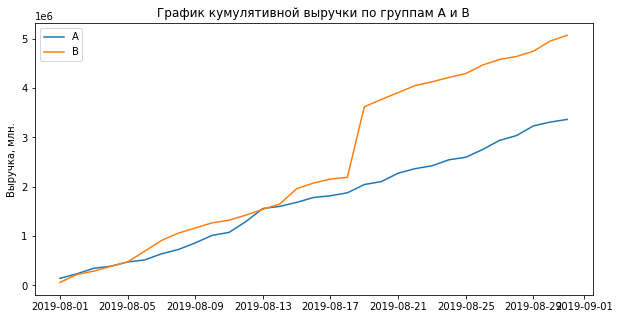

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам А и В')
plt.ylabel("Выручка, млн.")
plt.legend()
plt.show()

Вывод: кумулятивная выручка группы В растет бысрее чем у группы А. У графика группы В есть точки резкого роста, это может говорить о всплесках числа заказов либо о появлении очень дорогих заказов.

2. *Построим график кумулятивного среднего чека по группам.*

Чтобы построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

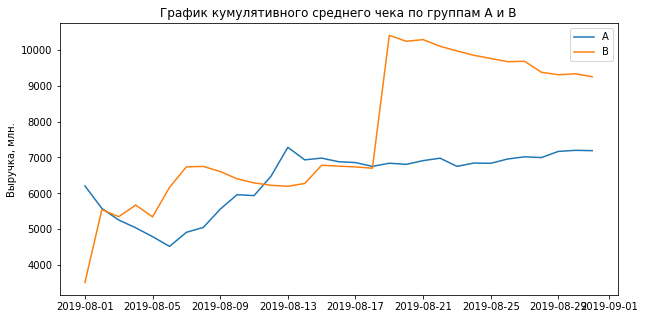

In [22]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам А и В')
plt.ylabel("Выручка, млн.")
plt.legend()
plt.show()

Вывод: на графике среднегго чека для группы В гдето 18 августа также наблюдаем резкий скачок средненго чека. Видимо в группе В в этот день были сделаны очень крупные заказы. Потом средний чек начинает падаеть. Это падение наблюдается и к концу теста. В группе А средний чек к концу теста становится равномерным. Но для группы В средний чек все же гораздо выше. 

3. *Построим график относительного изменения кумулятивного среднего чека группы B к группе A.*

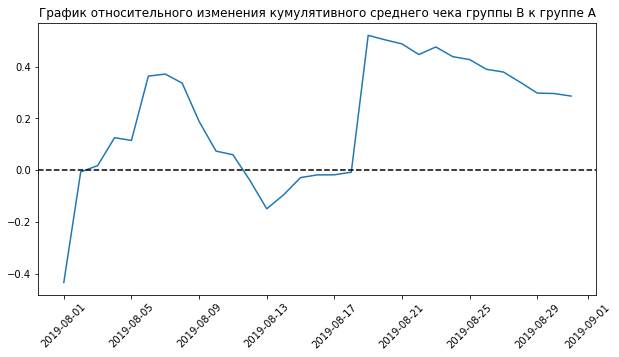

In [23]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.show()


В нескольких точках график различия между сегментами резко «скачет». Точно где то спрятались крупные заказы и выбросы.

4. *Постройте график кумулятивного среднего количества заказов на посетителя по группам.*

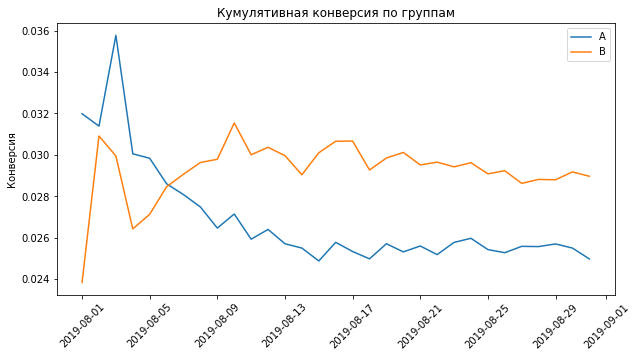

In [24]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.ylabel('Конверсия')
plt.xticks(rotation=45)
plt.show()


Вывод: после 3 августа конверсия группы А пошла на спад. 6 августа она сравнялись с Группой В. Затем группа В продолжила  расти, а конверсия группы А продолжила падать.

5. *Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.*

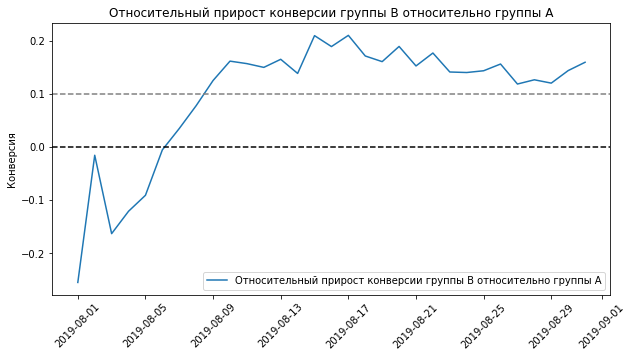

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.legend()
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.ylabel('Конверсия')
plt.xticks(rotation=45)
plt.show()



В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова временами падала, но теперь постепенно растёт.
Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.
И проанализировать данные после чистки от выбросов еще раз.

5. *Построим точечный график количества заказов по пользователям.*

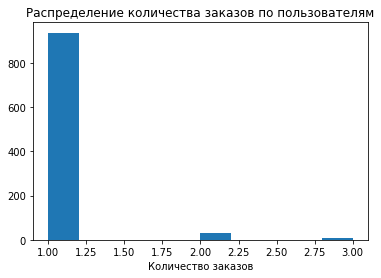

In [26]:
# Изучим гистограмму распределения стоимостей заказов.
# сгруппируем таблицу orders по пользователям и посчитаем количество заказов 
# на каждого пользователя
orders_users = (orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_users.columns =  ['visitorId', 'orders']

# строим гистограмму Распределение количества заказов по пользователям:
plt.hist(orders_users['orders']) 
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')

plt.show()
    

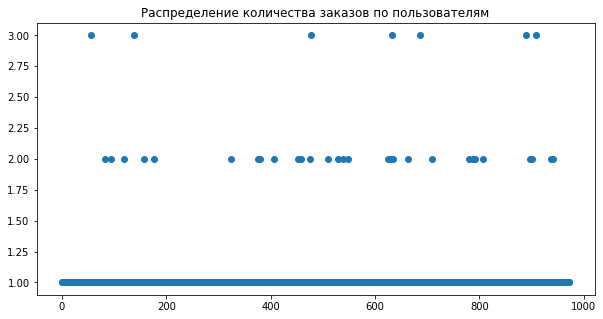

In [27]:
x_values = pd.Series(range(0,len(orders_users)))

# строим точечную диаграмму
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders_users['orders'])
plt.title('Распределение количества заказов по пользователям')
plt.show()

В основном пользователи оформляли по 1 заказу, но те кто успели оформить от 2 до 3 заказов. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

7.*Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.*

In [28]:
print(np.percentile( orders_users['orders'], [95, 99]))

[1. 2.]


Только  1% пользователей оформляли 2 заказа и больше.

8. *Постройте точечный график стоимостей заказов.*

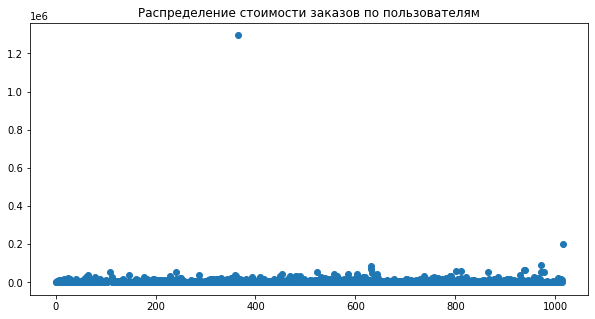

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

На графике виден этот аномальный заказ, который вызвал всплеск на графиках кумулятивных метрик.

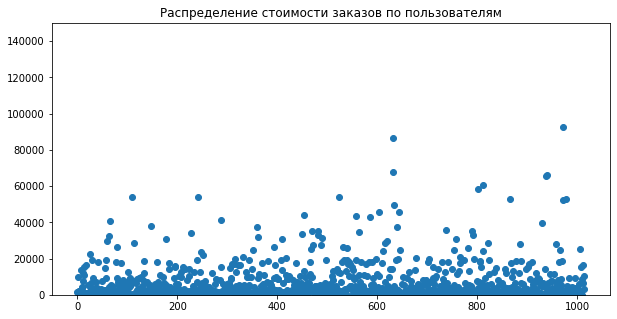

In [30]:
# Оценим аналогичный график без двух крупных выбросов.
plt.figure(figsize=(10,5))
plt.ylim(0, 150000)
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

Картина более ясная. Основнаячя масса заказов в пределах 20000.

9. *Посчитаем 95-й и 99-й перцентили стоимости заказов.*

In [31]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Выберим границу для определения аномальных заказов в 53904. 

10. *Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.*

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]


ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Напомним названия столбцов данных:
date — дата;

ordersPerDateA — количество заказов в выбранную дату в группе A;

revenuePerDateA — суммарная выручка в выбранную дату в группе A;

ordersPerDateB — количество заказов в выбранную дату в группе B;

revenuePerDateB — суммарная выручка в выбранную дату в группе B;

ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;

revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;

ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;

revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;

visitorsPerDateA — количество пользователей в выбранную дату в группе A;

visitorsPerDateB — количество пользователей в выбранную дату в группе B;

visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;

visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [41]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

In [35]:
alpha = 0.05
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
print("P-value: {0:.3f}".format(p_value))

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост В к А: {0:.3%}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.980%


11. *Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.*

Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей. Сформулируем гипотезы. Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.

In [36]:
alpha = 0.05
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print("P-value: {0:.3f}".format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост В к А: {0:.3%}".format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1))

P-value: 0.829
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: 28.660%


Вывод: так как не получилось отвергнуть нулевую гипотезу о том, что различий в среднем чеке между группами нет, выходит что относительный прирост В к А в 28.660% не является статистически значимым.

12. *Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.*

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 53 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 1 — usersWithManyOrders и пользователей, совершивших заказы дороже 53 904— usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [37]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
36      366673373
51      406208401
67      522292794
dtype: int64
45


Всего 45 аномальных пользователей. 

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [38]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [39]:
# Применим статистический критерий Манна-Уитни к полученным выборкам:
alpha = 0.05
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print("P-value: {0:.3f}".format(p_value))

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост В к А: {0:.3%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.008
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 18.757%


На очищенных данных разница в конверсии между группами есть, а относительный прирост конверсии группы В отнистельно группы А увеличился с 15.980% до 19.080%.

Результаты по среднему количеству заказов практически не изменились. Произошло ли что-нибудь с результатами по среднему чеку?


13. *Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным*

In [40]:
alpha = 0.05
p_value = stats.mannwhitneyu(orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
print("P-value: {0:.3f}".format(p_value))

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост В к А: {0:.3%}".format(orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ))

P-value: 0.969
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: 0.239%


P-value вырос и составил 0.969, это позволяет нам не отвергнуть нулевую гипотезу о том что разлчий в среднем чеке между группами нет. Разница в среднем чеке между группами не является статистически зачимой.

*Вывод*

На основании проведенного анализа можно сделать следующие заключения.

Относительно приоретизации гипотез, больше внимания следует уделить гипотезам:

- Запустить акцию, дающую скидку на товар в день рождения.	
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Если при выборе гиптезы необходимо учесть то скольких пользователе она затронет, тогда следует отдать предпочтение следующим гипотезам:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылокю
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказаю
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.


При анализе А/В теста было установленно что:

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
-  Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий.  
- График Относительного прироста конверсии группы B относительно группы A показывает, что результаты группы В значительно лучше группы А.

Принимаем решение остановить тест и принять победу группы В.
